In [4]:
"""
feature selection 
scaling 
imbalanced.

threshhold for each parameters

"""

'\nfeature selection \nscaling \nimbalanced.\n\nthreshhold for each parameters\n\n'

# knn 

- non parametric
- classification
- regression 

## advantage 

- accurate

## disadvantage

- less effective for high dimensional data.

- computational time
  
- non-parametric >>> carry the train data around to perform. 

## you have to think about it before

### preprocess for knn

- scaling
    - normalization is the most proper 

<< one of hyper parameter is distance 

### curse of dimensionality 

<=> high dimension >>> pick up data from thin distribution >>> distance get smaller

- in real world data, usually the # of features is less than the sample size. << wanna check shape of data set.


## con 

- computational time O(ND)
- non-parametric >>> carry the traing data around to perform.


## how it is used 

combination of neural network and KNN

## hyper parameter of knn

### distance 

- cosine
- haming
- minkowski
  - euclidean
  - manhattan
- chevyshev
- jaccard
- haversine
- ??? slide 

### k 

the number of nearest neighbors

- influence the smoothness
  - large k >> simple  >>> risk of underfittiing
  - small k >>> complex / flexible >>> risk of overfitting
 
### how to tune

1. choose metric
2. choose the type of parameter and range of value for each
3. implement the cross validation
4. compare score of metrics for both train and test data ( plotting the graph ) 



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
cols = X.columns

In [7]:
X.head(5)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head(5)

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [9]:
X.shape

(150, 4)

In [10]:
X.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object

In [11]:
y.dtypes

class    object
dtype: object

In [12]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
X.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [14]:
y.isnull().sum()

class    0
dtype: int64

In [15]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


<Axes: xlabel='class', ylabel='count'>

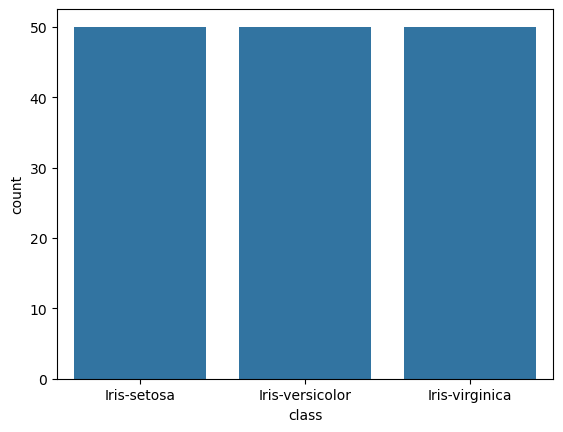

In [16]:
sns.countplot(x = "class", data = y)

>>>> categorical response variable is not imbalanced. 

In [18]:
# KNN requires feature scaling
from sklearn import preprocessing as p


In [19]:
std1 = (X-X.mean())/(X.max()-X.min())
std2 = (X-X.mean())/ (X.std())

In [20]:
data1 = pd.concat([std1,y], axis = 1)
data2 = pd.concat([std2, y], axis = 1)

In [21]:
# I would like to know which one is good predictors

"""

categorical and numerical 

dense + hue 

point/scatter + hue

"""

'\n\ncategorical and numerical \n\ndense + hue \n\npoint/scatter + hue\n\n'

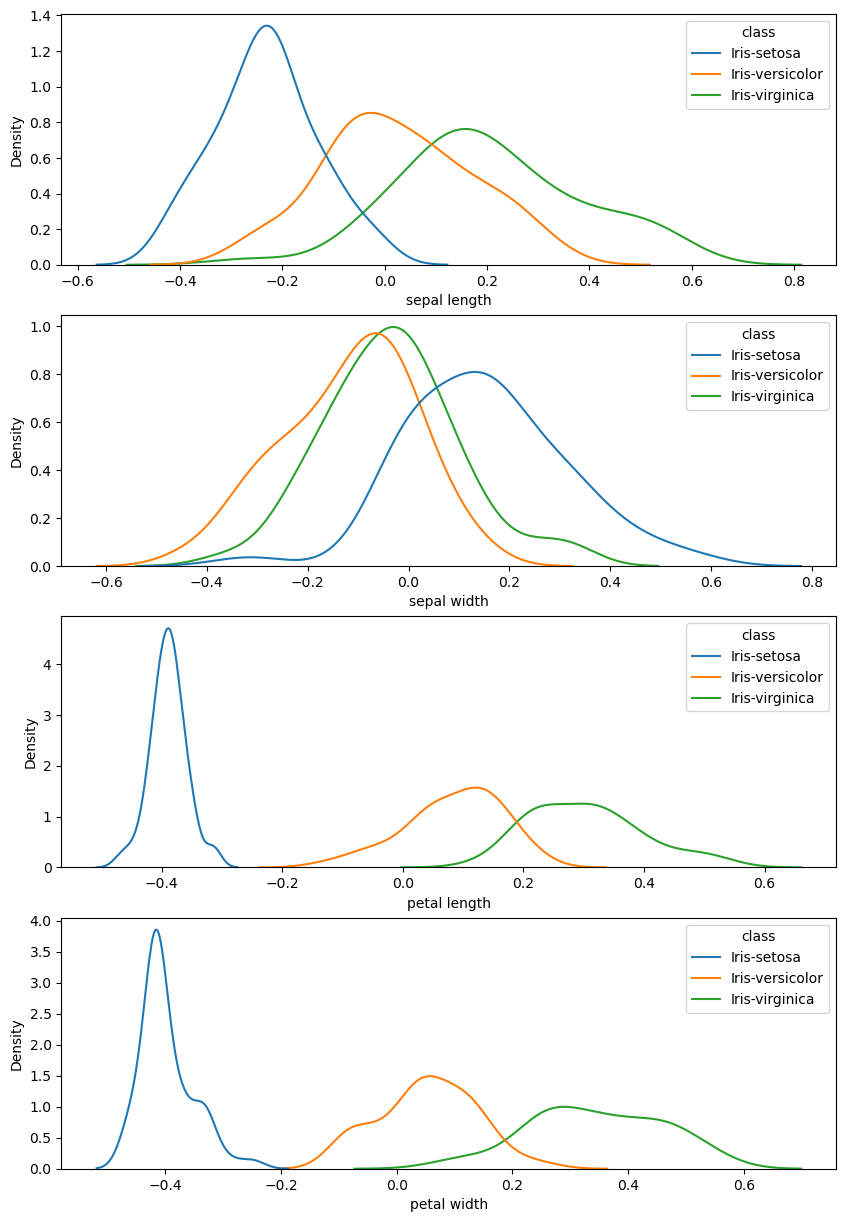

In [22]:
fig, axes = plt.subplots(4,1,figsize=(10,15))
for i,col in enumerate(cols):
    sns.kdeplot(data = data1, x = col, hue="class",ax = axes[i])

when factors in categorical variable is more than 3, you might prefer point/scatter plot and hue

it is hard to plot point / scatter plot with this type of table
>> you want to do melt for this table

In [24]:
melt1 = pd.melt(data1, id_vars = 'class', var_name = 'features',value_name = 'value')
melt2 = pd.melt(data2,id_vars = "class", var_name = "features", value_name = "value")
melt1

,class,features,value
0,Iris-setosa,sepal length,-0.206481
1,Iris-setosa,sepal length,-0.262037
2,Iris-setosa,sepal length,-0.317593
3,Iris-setosa,sepal length,-0.345370
4,Iris-setosa,sepal length,-0.234259
...,...,...,...
595,Iris-virginica,petal width,0.458889
596,Iris-virginica,petal width,0.292222
597,Iris-virginica,petal width,0.333889
598,Iris-virginica,petal width,0.458889


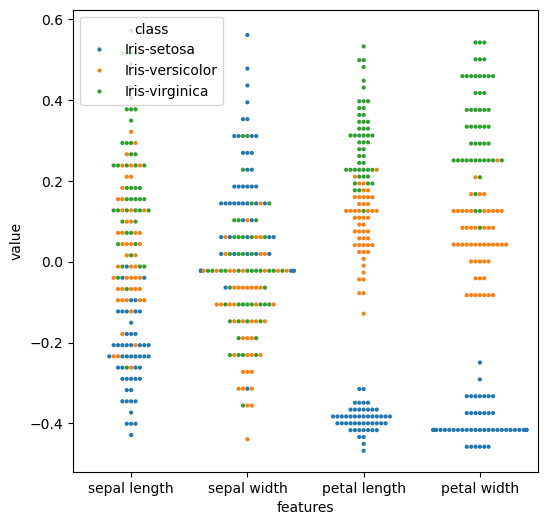

In [25]:
plt.figure(figsize=(6,6))
sns.swarmplot(x="features",y="value",hue="class",data=melt1, s=3)
plt.show()

petal length and petal width might be good feature

# correlation between numerical features


<Axes: >

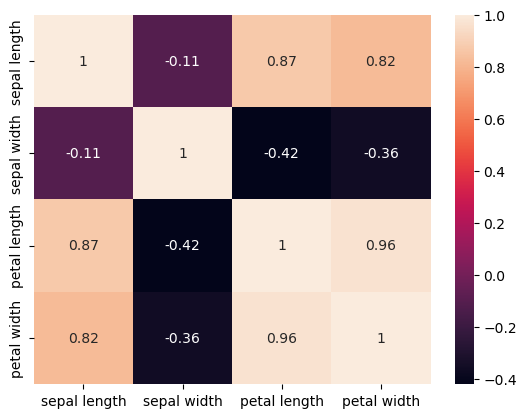

In [28]:
sns.heatmap(std1.corr(),annot=True)
# threshold is >0.8

# feature selection

- one way of analyzing the multivariate


## feature extraction 

- PCA
- Factorial analysis. 

In [30]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,SelectKBest

# in preprocess phase 
# you want to use univariate feature selection (using statistical tests)


# classification >> scoring function is chi2, f_classif, mutual_info_selection

# you can not use them with test data. 

# we use statistical 

In [32]:
from sklearn.model_selection import train_test_split
x_tr, x_ts, y_tr, y_ts = train_test_split(X,y,random_state = 0)
y_tr = y_tr.values.ravel()
y_ts = y_ts.values.ravel()

In [33]:
fe1 = SelectKBest(chi2,k = 2).fit(x_tr,y_tr)
print(f"score{fe1.scores_}:")
print(f"Columns:{x_tr.columns}")

score[ 9.17942135  2.38729628 89.33693113 51.91944934]:
Columns:Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


In [34]:
# petal length and petal width

In [35]:
fe2 = SelectKBest(f_classif, k=2).fit(x_tr,y_tr)
print(f"Score {fe2.scores_}")
print(f"Columns {x_tr.columns}")

Score [ 97.40415147  28.70153517 890.49613042 763.18137566]
Columns Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


In [36]:
# petal length and petal width

In [37]:
fe3 = SelectKBest(mutual_info_classif, k=2).fit(x_tr,y_tr)
print(f"score{fe3.scores_}")
print(f"columns {x_tr.columns}")

score[0.55467572 0.25397191 0.99273428 0.98183231]
columns Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


In [38]:
# petal length/ petal width 

In [39]:
x_tr2 = fe1.transform(x_tr)
x_ts2 = fe1.transform(x_ts)
x_tr2.shape

(112, 2)

In [40]:
from sklearn import preprocessing as p

# knn requires scaling 

"""
1. normalizer

(x - mean) / std

2. standard scalor

(x- mean) / (max(x) - min(x)) 
"""

x_tr = p.StandardScaler().fit(x_tr2).transform(x_tr2.astype(float))
x_ts = p.StandardScaler().fit(x_ts2).transform(x_ts2.astype(float))

# KNN 

# hyper parameter 

## k  
## distance 


In [43]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
acc = np.zeros(20)

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_tr,y_tr)

    yhat = knn.predict(x_ts)
    acc[i-1] = metrics.accuracy_score(y_ts,yhat)

acc

array([0.94736842, 0.94736842, 0.94736842, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.94736842])

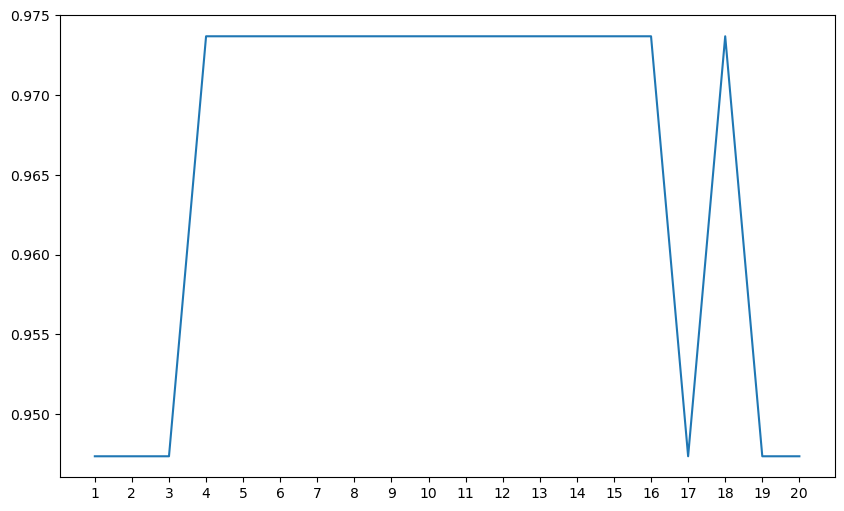

In [44]:
loc = np.arange(1,21,step = 1.0)
plt.figure(figsize = (10,6))
plt.plot(range(1,21),acc)
plt.xticks(loc)
plt.show()

# hyper parameter tuning

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [46]:
from sklearn.model_selection import GridSearchCV


grid_params = {
    "n_neighbors":[5,7,9,11,13,15],
    "weights":["uniform","distance"],
    "metric":["minkowski","euclidean","manhattan"]
}

In [47]:
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1, n_jobs=1)

In [48]:
g_res = gs.fit(x_tr,y_tr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [49]:
g_res.best_score_

0.9557312252964426

In [50]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = "uniform",metric = "minkowski")
knn.fit(x_tr,y_tr)

KNeighborsClassifier()

In [52]:
pred_tr = knn.predict(x_tr)
pred_ts = knn.predict(x_ts)

the distribution of response variable is equal >>> accuracy works well for metrics. 

when categorical response variable does not distribute equally >> precision/recall/f1score/ specificity

# model evaluation 
## metric 

## cross validation score

In [55]:
#train accuracy 
from sklearn import metrics

metrics.accuracy_score(y_tr,pred_tr)

0.9553571428571429

In [56]:
metrics.accuracy_score(y_ts,pred_ts)

0.9736842105263158

In [57]:
# Accuracy score of test is higher than that of train >>> overfitting is not happening.
# Both train score and test score is not high >>> underfitting is not happening.

In [58]:
metrics.confusion_matrix(pred_ts,y_ts)

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]])

In [59]:
metrics.classification_report(pred_ts,y_ts)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        13\nIris-versicolor       0.94      1.00      0.97        15\n Iris-virginica       1.00      0.90      0.95        10\n\n       accuracy                           0.97        38\n      macro avg       0.98      0.97      0.97        38\n   weighted avg       0.98      0.97      0.97        38\n'